<a href="https://colab.research.google.com/github/pamelladon/FTW3-Day3/blob/master/Classification_Income_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification  


# 1. Import Packages

In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix

# 2. Clean Data

In [0]:
data = pd.read_csv('census.csv')

In [0]:
data.head(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [0]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

resulting features to choose based on KBest array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False])

In [0]:
data['age'].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [0]:
#data.describe

In [0]:
#describes the type of data you have
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [8])
#x = onehotencoder.fit_transform("race").toarray()

In [0]:
#transform objects into integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data.apply(le.fit_transform)

In [0]:
data.dtypes

age                int64
workclass          int64
education_level    int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income             int64
dtype: object

In [0]:
data.head(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,9,12,4,0,1,4,1,26,0,39,38,0
1,33,4,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
5,20,2,12,13,2,3,5,4,0,0,0,39,38,0
6,32,2,6,4,3,7,1,2,0,0,0,15,22,0
7,35,4,11,8,2,3,0,4,1,0,0,44,38,1
8,14,2,12,13,4,9,1,4,0,107,0,49,38,1
9,25,2,9,12,2,3,0,4,1,80,0,39,38,1


In [0]:
data.shape

(45222, 14)

In [0]:
data["income"]

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [0]:
y=data["income"]
#assigns features except for the first one mentioned
X=data.drop(["income"],axis=1) 

In [0]:
X.shape

(45222, 13)

# Feature Selection

I wanted to select the best features for the model. I used KBest for this as using RFE was taking too long.

In [0]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
#X, y = load_digits(return_X_y=True)
#X.shape

X_new = SelectKBest(chi2, k=10)
X_new.fit(X, y)


SelectKBest(k=10, score_func=<function chi2 at 0x7fe4c7e39bf8>)

In [0]:
X_new.get_support()

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False])

In [0]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [0]:
X_new

SelectKBest(k=10, score_func=<function chi2 at 0x7fe4c7e39bf8>)

In [0]:
#from sklearn.feature_selection import RFE
#from sklearn.svm import SVR

In [0]:
#estimator = SVR(kernel="linear")
#selector = RFE(estimator,5,step=1)
#selector = selector.fit(X, y)

In [0]:
#selector

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# 4. Predictive Analytics using Logistic Regression
Train a model that predicts if the person clicked on the ad or not.

In [0]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# feature importance
log_reg.coef_

array([[ 0.03493122, -0.1257196 ,  0.02120549,  0.32332857, -0.23378934,
        -0.00483007, -0.13889961,  0.09641842,  0.86170554,  0.02649899,
         0.02637304,  0.02767017, -0.00661153]])

# 5. Metrics

## Accuracy
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples:



In [0]:
# accuracy
acc

0.8195588479186245

## Precision

In [0]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7066388599235315

## Recall

In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.45654614866382215

##  Confusion Matrix 

0 are those with income < 50k. 
1 are those with income at >50k

In [0]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[12792,   844],
       [ 2420,  2033]])

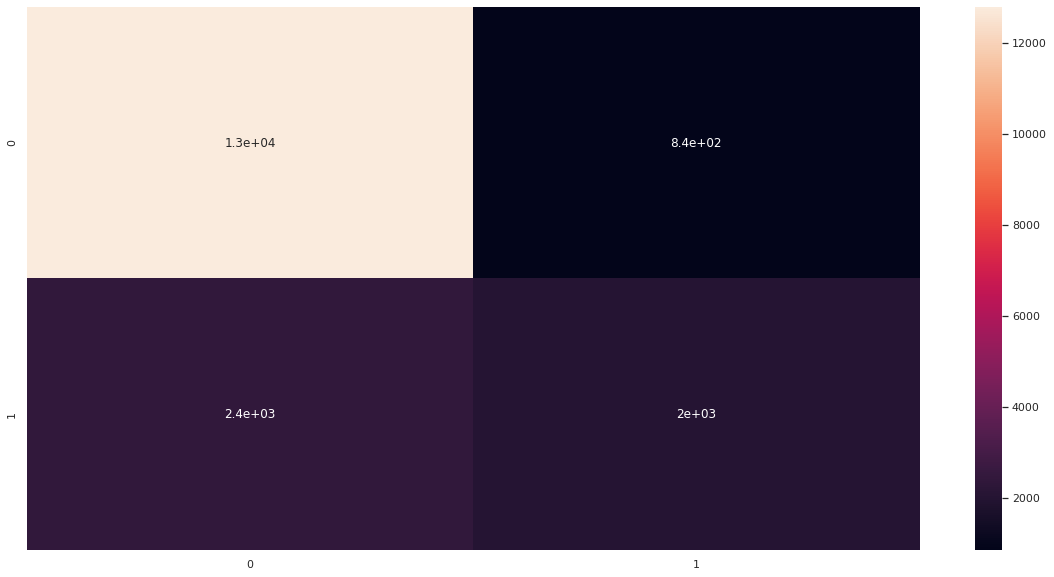

In [0]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

## ROC Curve

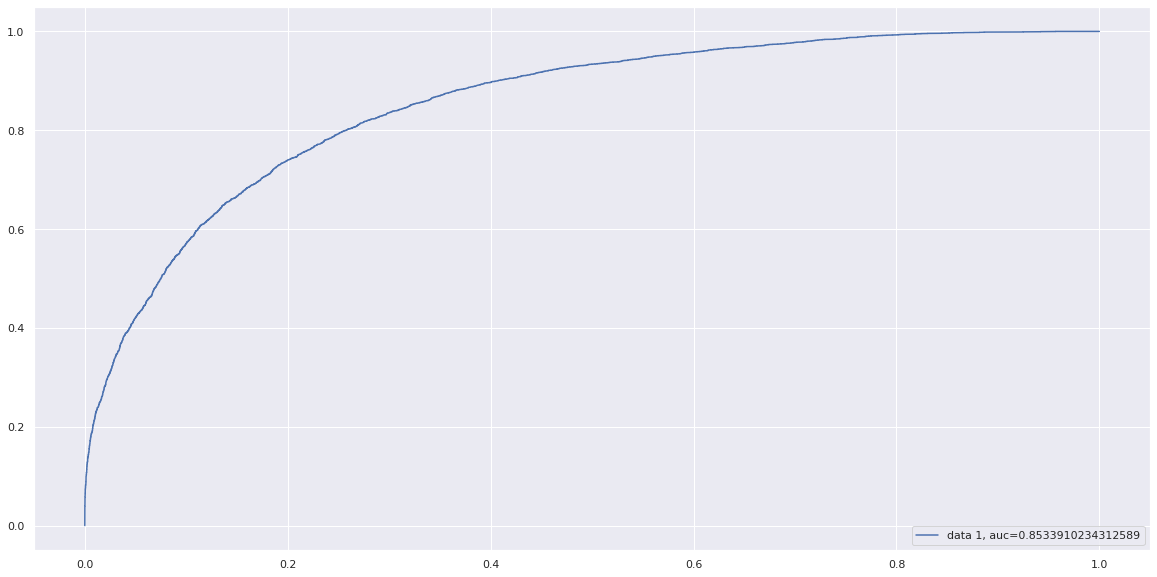

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE

This technique "added" more data to make the smaller data more visible.


In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
X

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,9,12,4,0,1,4,1,26,0,39,38
1,33,4,9,12,2,3,0,4,1,0,0,12,38
2,21,2,11,8,0,5,1,4,1,0,0,39,38
3,36,2,1,6,2,5,0,2,1,0,0,39,38
4,11,2,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,16,2,9,12,4,9,3,4,1,0,0,39,38
45218,22,2,9,12,0,9,1,4,0,0,0,35,38
45219,21,2,9,12,2,9,0,4,1,0,0,49,38
45220,27,2,9,12,0,0,3,1,1,81,0,39,38


In [0]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [0]:
y.describe

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64>

In [0]:
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,16,2,9,12,4,9,3,4,1,0,0,39,38,0
45218,22,2,9,12,0,9,1,4,0,0,0,35,38,0
45219,21,2,9,12,2,9,0,4,1,0,0,49,38,0
45220,27,2,9,12,0,0,3,1,1,81,0,39,38,0
45221,18,3,9,12,2,3,0,4,1,0,0,59,38,1


In [0]:
y_res
print(y_res)

[0 0 0 ... 1 1 1]


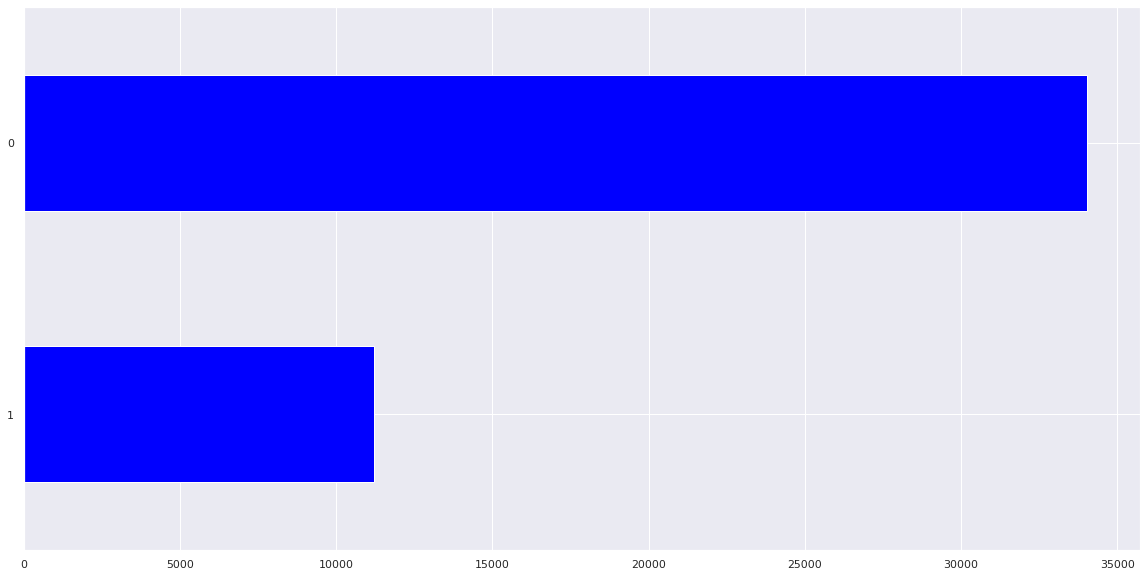

In [0]:
data.income.value_counts().plot(kind="barh",color="blue")
plt.gca().invert_yaxis()

# Modeling using Random Forest

using the model on the train model data, and checking the metrics, it is seen that the accuracy, precision, and recall scores has increased. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [0]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
X_train.shape

(27133, 13)

In [0]:
y_train.shape

(27133,)

## Accuracy


In [0]:
clf.score(X_train, y_train)

0.9645450189805772

In [0]:
y_pred=clf.predict(X_train)


## Confusion Matrix

In [0]:
cf = confusion_matrix(y_train, y_pred)
cf

array([[20046,   332],
       [  630,  6125]])

## Precision

In [0]:
prec = 6125/(332+6125)
prec

0.9485829332507356

## Recall

In [0]:
recall = 6125/(630+6125)
recall

0.9067357512953368

In [0]:
y_train.value_counts()

0    20378
1     6755
Name: income, dtype: int64